In [1]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
import re

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from missingno import matrix

In [3]:
DATA_PATH = Path() / "../data"
DATA_PATH.mkdir(parents=True,exist_ok=True)

def load_data(filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    return pd.read_csv(csv_path,encoding=encoding)

def save_data(data, filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    data.to_csv(csv_path, index=False,encoding='ISO-8859-1')


In [4]:
PLOT_PATH = Path() / "../plot"
PLOT_PATH.mkdir(parents=True,exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300, transparent=True):
    path = PLOT_PATH / f"{fig_id}.{fig_extension}"
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution, transparent=transparent)

In [5]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk
import re

In [6]:
# Download NLTK resources (stopwords and tokenizer)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize stemmer
stemmer = PorterStemmer()

# Get English stop words
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yanhuanhuang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yanhuanhuang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yanhuanhuang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
def pre_process(text):
    
    # lowercase
    text=str(text).lower()

    # remove numbers followed by dot (like, "1.", "2.", etc)
    text=re.sub('((\d+)[\.])', '', text)
    
    #remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # correct some misspellings and/or replace some text with others that might be easier to handle
    text=text.replace('do not', "don't")
    
    # remove special characters except spaces, apostrophes and dots
    text=re.sub(r"[^a-zA-Z0-9.']+", ' ', text)
    
    tokens = [word for word in text.split(' ') if word not in stop_words]
    lmtzr = WordNetLemmatizer()
    lemmatized_text = ' '.join(lmtzr.lemmatize(word) for word in tokens if word not in stop_words)
    
    return lemmatized_text

In [8]:
data = load_data("McDonald_s_Reviews.csv")
data

reviewer_id  store_name              category  \
0                1  McDonald's  Fast food restaurant   
1                2  McDonald's  Fast food restaurant   
2                3  McDonald's  Fast food restaurant   
3                4  McDonald's  Fast food restaurant   
4                5  McDonald's  Fast food restaurant   
...            ...         ...                   ...   
33391        33392  McDonald's  Fast food restaurant   
33392        33393  McDonald's  Fast food restaurant   
33393        33394  McDonald's  Fast food restaurant   
33394        33395  McDonald's  Fast food restaurant   
33395        33396  McDonald's  Fast food restaurant   

                                           store_address  latitude   \
0      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
1      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
2      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
3      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
4      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
...                                                  ...        ...   
33391  3501 Biscayne Blvd, Miami, FL 33137, United St...  25.810000   
33392  3501 Biscayne Blvd, Miami, FL 33137, United St...  25.810000   
33393  3501 Biscayne Blvd, Miami, FL 33137, United St...  25.810000   
33394  3501 Biscayne Blvd, Miami, FL 33137, United St...  25.810000   
33395  3501 Biscayne Blvd, Miami, FL 33137, United St...  25.810000   

       longitude rating_count   review_time  \
0     -97.792874        1,240  3 months ago   
1     -97.792874        1,240    5 days ago   
2     -97.792874        1,240    5 days ago   
3     -97.792874        1,240   a month ago   
4     -97.792874        1,240  2 months ago   
...          ...          ...           ...   
33391 -80.189098        2,810   4 years ago   
33392 -80.189098        2,810    a year ago   
33393 -80.189098        2,810    a year ago   
33394 -80.189098        2,810   5 years ago   
33395 -80.189098        2,810   2 years ago   

                                                  review   rating  
0      Why does it look like someone spit on my food?...   1 star  
1      It'd McDonalds. It is what it is as far as the...  4 stars  
2      Made a mobile order got to the speaker and che...   1 star  
3      My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...  5 stars  
4      I repeat my order 3 times in the drive thru, a...   1 star  
...                                                  ...      ...  
33391                        They treated me very badly.   1 star  
33392                           The service is very good  5 stars  
33393                         To remove hunger is enough  4 stars  
33394  It's good, but lately it has become very expen...  5 stars  
33395                          they took good care of me  5 stars  

[33396 rows x 10 columns]

# EDA

<Axes: >

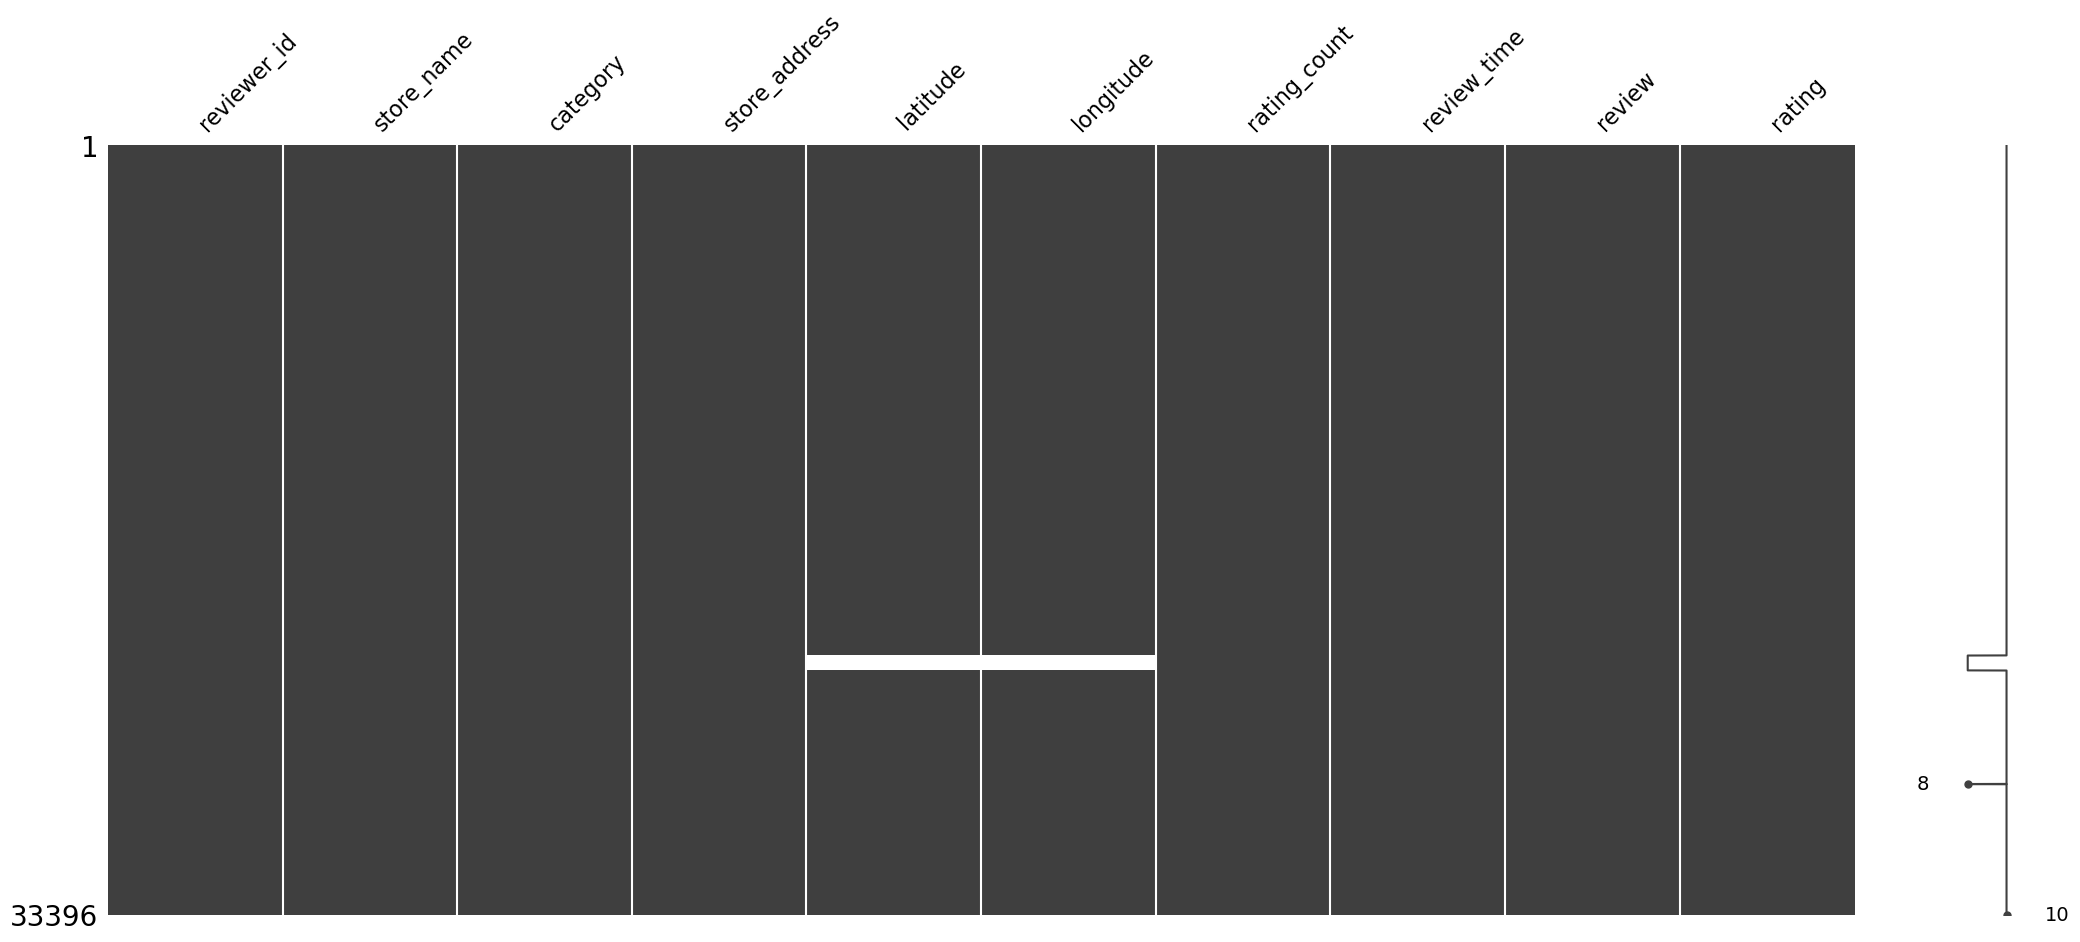

In [9]:
matrix(data)

<Axes: >

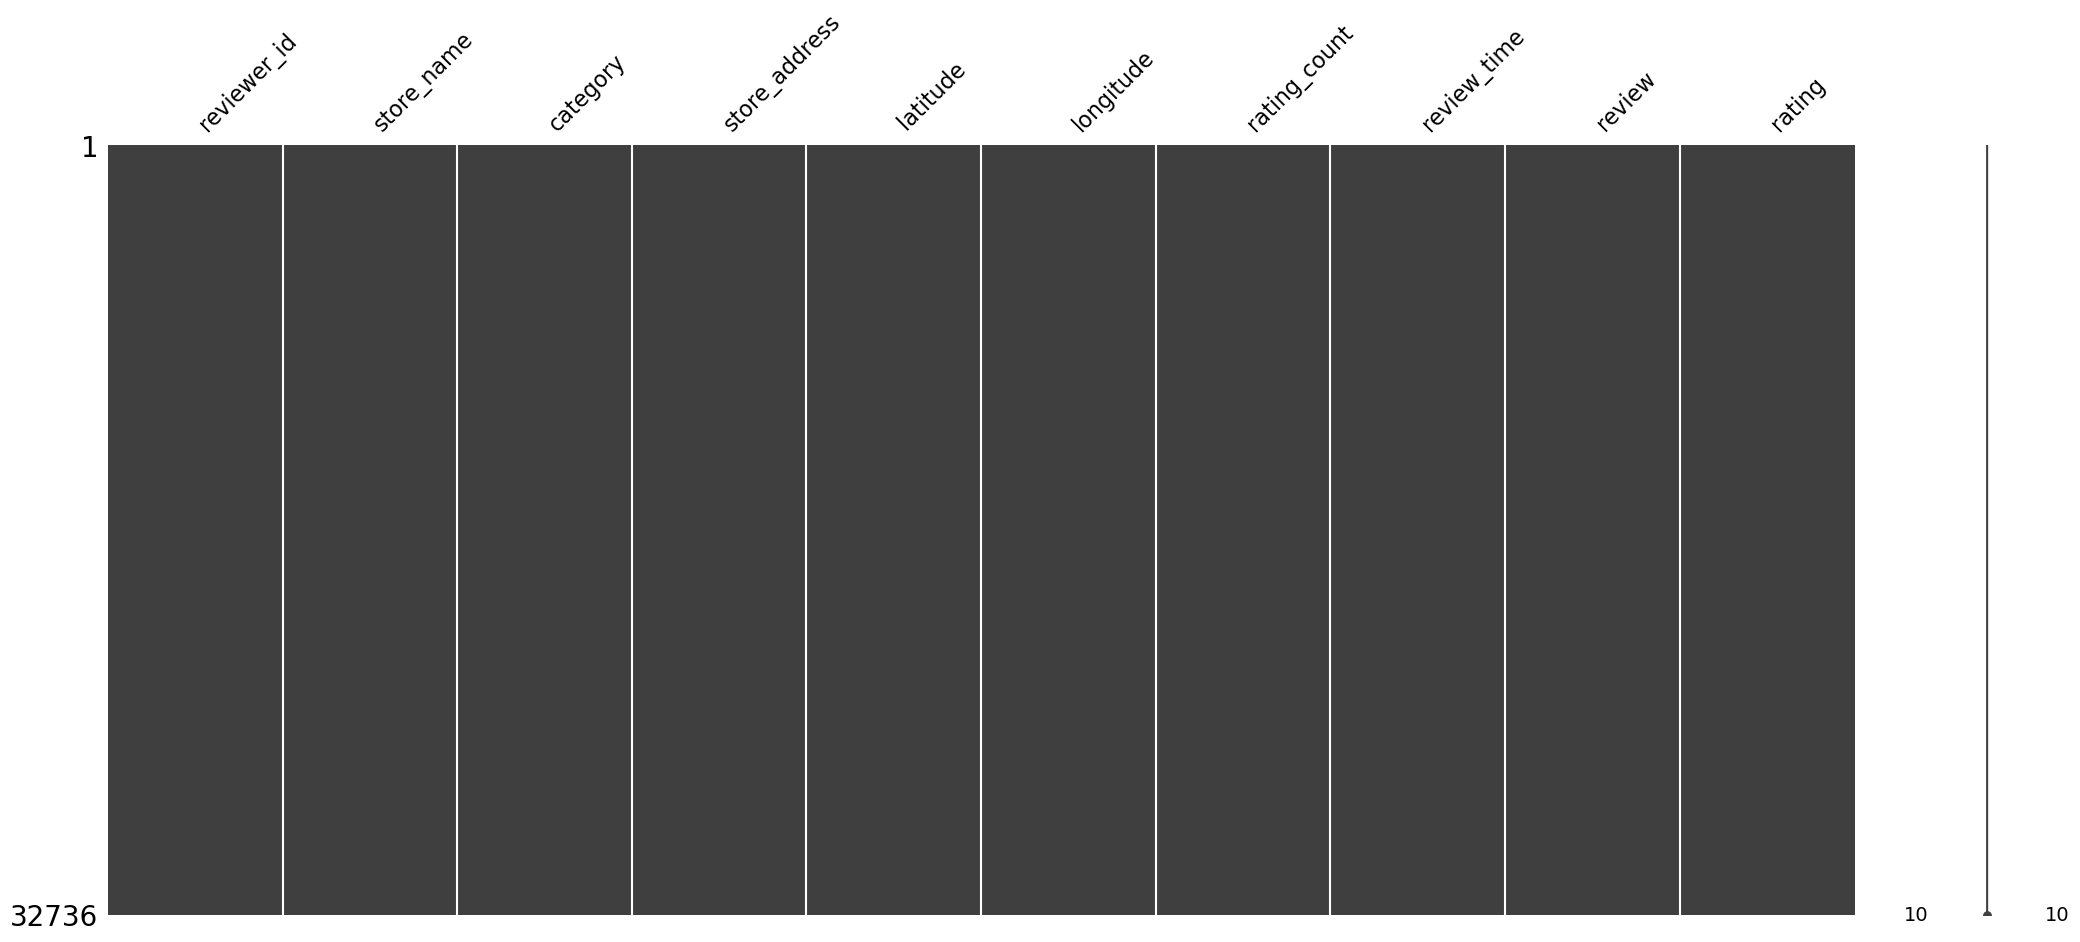

In [10]:
data.dropna(inplace=True)
matrix(data)

In [11]:
# Apply the basic preprocessing to the review column using nltk
data['processed_review_nltk'] = data['review'].apply(pre_process)
data[['review', 'processed_review_nltk']].head()

review  \
0  Why does it look like someone spit on my food?...   
1  It'd McDonalds. It is what it is as far as the...   
2  Made a mobile order got to the speaker and che...   
3  My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...   
4  I repeat my order 3 times in the drive thru, a...   

                               processed_review_nltk  
0  look like someone spit food normal transaction...  
1  it'd mcdonalds. far food atmosphere go. staff ...  
2  made mobile order got speaker checked in. line...  
3  mc. crispy chicken sandwich customer service q...  
4  repeat order 3 time drive thru still manage me...

In [12]:
# Drop rows with NaN values in the "processed_review_basic" column
data['processed_review_nltk'] = data['processed_review_nltk'].fillna('')
data = data[data['processed_review_nltk'] != '']

In [13]:
data['rating_numeric'] = data['rating'].apply(lambda x: int(x.split()[0]) if pd.notnull(x) and x.split()[0].isdigit() else None)
data['rating_numeric'].value_counts().sort_index()

/var/folders/wf/2r4hslkn0cv6g5b9rp14lh240000gn/T/ipykernel_7932/1546544394.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating_numeric'] = data['rating'].apply(lambda x: int(x.split()[0]) if pd.notnull(x) and x.split()[0].isdigit() else None)


rating_numeric
1     9266
2     3014
3     4694
4     5633
5    10042
Name: count, dtype: int64

/Users/yanhuanhuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/Users/yanhuanhuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead

/Users/yanhuanhuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: DeprecationWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead



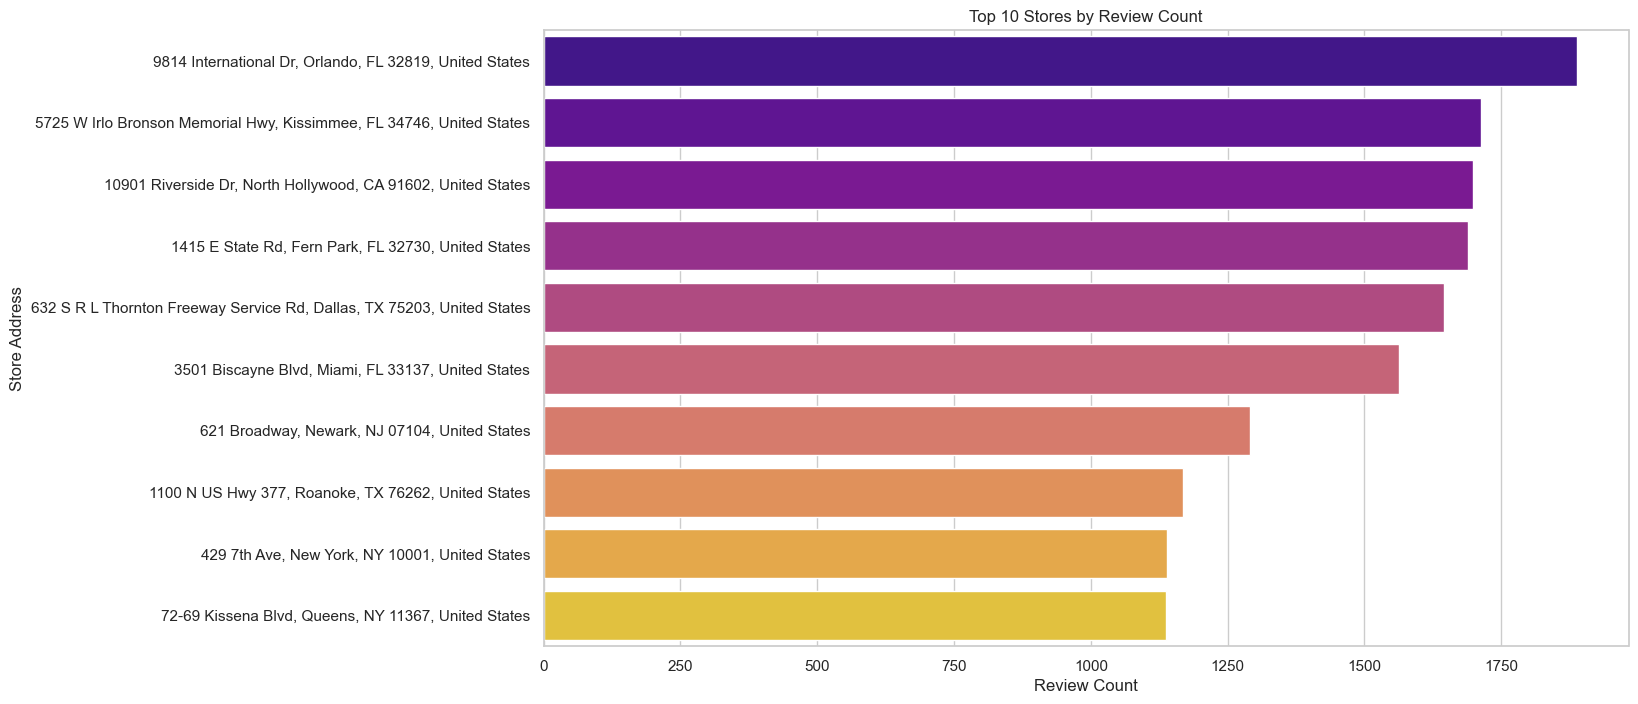

In [70]:
# Review counts per store
import seaborn as sns
plt.figure(figsize=(14, 8))
reviews_per_store = data['store_address'].value_counts().head(10)  # Top 10 stores by review count
sns.barplot(x=reviews_per_store.values, y=reviews_per_store.index, palette = "plasma")
plt.title('Top 10 Stores by Review Count')
plt.xlabel('Review Count')
plt.ylabel('Store Address')
plt.show()

In [71]:
import plotly.express as px

# Ensure the column names do not have trailing spaces
data.columns = data.columns.str.strip()

# Create the scatter mapbox plot
fig = px.scatter_mapbox(data, lat="latitude", lon="longitude",
                        hover_name="store_name",  # Assuming you want to see store names on hover
                        color_discrete_sequence=["fuchsia"], zoom=3)

# Update the layout to remove margins
fig.update_layout(mapbox_style="open-street-map")

fig.update_layout(
    autosize=True,
    margin=dict(l=0, r=0, t=0, b=0, pad=0),
    template="plotly",  # or "plotly_white", "plotly_dark", etc.
)

# Increase the size of the points
fig.update_traces(marker=dict(size=15))

file_path = str(PLOT_PATH) + "/McDonald's location.html"
# Save the figure as HTML
fig.write_html(file_path, full_html=True, auto_open=False, config={"responsive": True})

fig.show()

/Users/yanhuanhuang/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/yanhuanhuang/anaconda3/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



/var/folders/wf/2r4hslkn0cv6g5b9rp14lh240000gn/T/ipykernel_7932/2795951446.py:23: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.

/var/folders/wf/2r4hslkn0cv6g5b9rp14lh240000gn/T/ipykernel_7932/2712330300.py:8: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



Saving figure ratings_boxplot


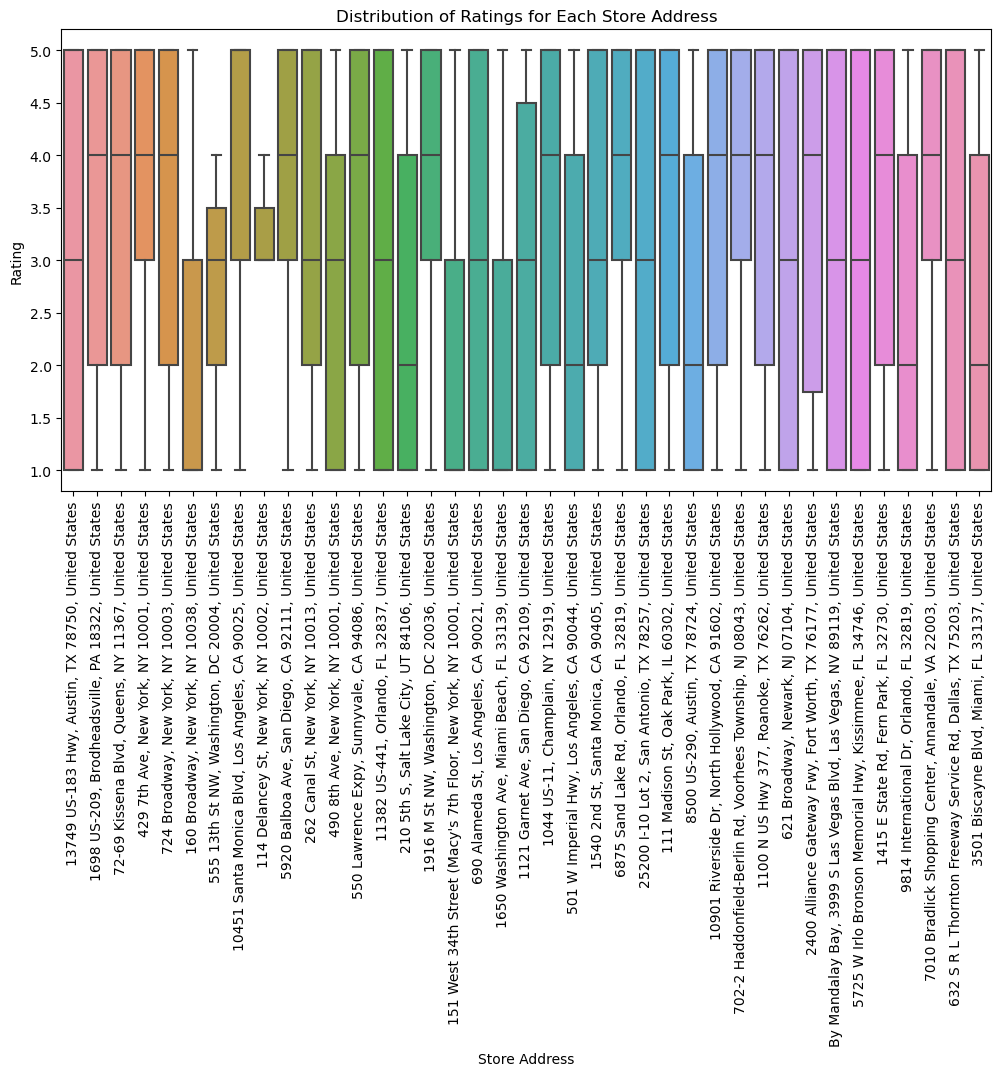

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your actual dataset here
# data = pd.read_csv('path_to_your_data.csv')

# Ensure the column names do not have trailing spaces
data.columns = data.columns.str.strip()

# Convert the 'rating' column to a numerical format
# Assuming the ratings are like "4 stars", "5 stars", etc.
# Extract the numerical part and convert it to an integer
# data['rating_numerical'] = data['rating'].str.extract('(\d+)').astype(float)

# Now create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='store_address', y='rating_numeric', data=data)
plt.title('Distribution of Ratings for Each Store Address')
plt.xlabel('Store Address')
plt.ylabel('Rating')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit the plot
save_fig("ratings_boxplot")
plt.show()

<>:10: DeprecationWarning:

invalid escape sequence '\d'

<>:10: DeprecationWarning:

invalid escape sequence '\d'

/var/folders/wf/2r4hslkn0cv6g5b9rp14lh240000gn/T/ipykernel_7932/1694521961.py:10: DeprecationWarning:

invalid escape sequence '\d'

/var/folders/wf/2r4hslkn0cv6g5b9rp14lh240000gn/T/ipykernel_7932/1694521961.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/wf/2r4hslkn0cv6g5b9rp14lh240000gn/T/ipykernel_7932/1694521961.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/

Saving figure ratings_boxplot_by_state


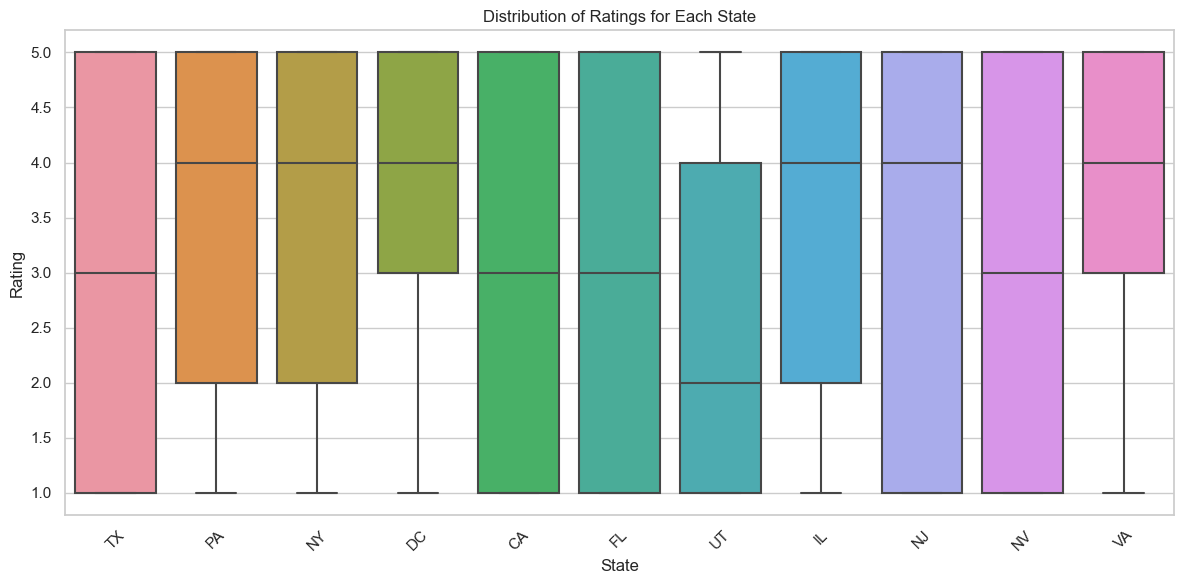

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Ensure the column names do not have trailing spaces
data.columns = data.columns.str.strip()

# Convert the 'rating' column to a numerical format
data['rating_numeric'] = data['rating'].str.extract('(\d+)').astype(float)

# Extract state from the 'store_address' column
# Assuming the state abbreviation is the last part after the last comma
data['state'] = data['store_address'].str.extract(r',\s*([A-Z]{2})\s+\d{5}')

# Now create the boxplot based on states
plt.figure(figsize=(12, 6))
sns.boxplot(x='state', y='rating_numeric', data=data)
plt.title('Distribution of Ratings for Each State')
plt.xlabel('State')
plt.ylabel('Rating')
plt.xticks(rotation=45)  # Adjust rotation if necessary
plt.tight_layout()  # Adjust layout to fit the plot
save_fig("ratings_boxplot_by_state")
plt.show()


In [18]:
sentiment_df = data[["reviewer_id", "review_time", "review", "processed_review_nltk", "rating_numeric"]]
def rating_to_sent(row):
    if row["rating_numeric"] > 3:
        return "Positive"
    elif row["rating_numeric"] < 3:
        return "Negative"
    else:
        return "Neutral"

data["rating_to_sent"] = data.apply(rating_to_sent, axis = 1)

/var/folders/wf/2r4hslkn0cv6g5b9rp14lh240000gn/T/ipykernel_7932/3811236351.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [19]:
data.head()

reviewer_id  store_name              category  \
0            1  McDonald's  Fast food restaurant   
1            2  McDonald's  Fast food restaurant   
2            3  McDonald's  Fast food restaurant   
3            4  McDonald's  Fast food restaurant   
4            5  McDonald's  Fast food restaurant   

                                       store_address   latitude  longitude  \
0  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
1  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
2  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
3  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
4  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   

  rating_count   review_time  \
0        1,240  3 months ago   
1        1,240    5 days ago   
2        1,240    5 days ago   
3        1,240   a month ago   
4        1,240  2 months ago   

                                              review   rating  \
0  Why does it look like someone spit on my food?...   1 star   
1  It'd McDonalds. It is what it is as far as the...  4 stars   
2  Made a mobile order got to the speaker and che...   1 star   
3  My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...  5 stars   
4  I repeat my order 3 times in the drive thru, a...   1 star   

                               processed_review_nltk  rating_numeric state  \
0  look like someone spit food normal transaction...             1.0    TX   
1  it'd mcdonalds. far food atmosphere go. staff ...             4.0    TX   
2  made mobile order got speaker checked in. line...             1.0    TX   
3  mc. crispy chicken sandwich customer service q...             5.0    TX   
4  repeat order 3 time drive thru still manage me...             1.0    TX   

  rating_to_sent  
0       Negative  
1       Positive  
2       Negative  
3       Positive  
4       Negative

# nltk tokenization + VADER sentiment

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# get_sentiment function
def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    sentiment = "Neutral"
    if scores['compound'] >= 0.05:
        sentiment = "Positive"
    elif scores['compound'] <= -0.05:
        sentiment = "Negative"
    return sentiment

# Function to get compound score
def get_compound_score(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

# Apply get_sentiment function to sample df
data["vader_sentiment"] = data['processed_review_nltk'].apply(get_sentiment)
data["compound_score"] = data['processed_review_nltk'].apply(get_compound_score)

# Optionally, save the sample to a CSV file
# data.to_csv("sentiment_and_compound_score.csv", index=False)

/var/folders/wf/2r4hslkn0cv6g5b9rp14lh240000gn/T/ipykernel_7932/1733239823.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/wf/2r4hslkn0cv6g5b9rp14lh240000gn/T/ipykernel_7932/1733239823.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [21]:
data.head()

reviewer_id  store_name              category  \
0            1  McDonald's  Fast food restaurant   
1            2  McDonald's  Fast food restaurant   
2            3  McDonald's  Fast food restaurant   
3            4  McDonald's  Fast food restaurant   
4            5  McDonald's  Fast food restaurant   

                                       store_address   latitude  longitude  \
0  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
1  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
2  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
3  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
4  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   

  rating_count   review_time  \
0        1,240  3 months ago   
1        1,240    5 days ago   
2        1,240    5 days ago   
3        1,240   a month ago   
4        1,240  2 months ago   

                                              review   rating  \
0  Why does it look like someone spit on my food?...   1 star   
1  It'd McDonalds. It is what it is as far as the...  4 stars   
2  Made a mobile order got to the speaker and che...   1 star   
3  My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...  5 stars   
4  I repeat my order 3 times in the drive thru, a...   1 star   

                               processed_review_nltk  rating_numeric state  \
0  look like someone spit food normal transaction...             1.0    TX   
1  it'd mcdonalds. far food atmosphere go. staff ...             4.0    TX   
2  made mobile order got speaker checked in. line...             1.0    TX   
3  mc. crispy chicken sandwich customer service q...             5.0    TX   
4  repeat order 3 time drive thru still manage me...             1.0    TX   

  rating_to_sent vader_sentiment  compound_score  
0       Negative        Positive          0.7334  
1       Positive        Positive          0.8591  
2       Negative        Negative         -0.2960  
3       Positive         Neutral          0.0000  
4       Negative        Negative         -0.7184

In [22]:
# Accuracy
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

cm1 = accuracy_score(data["rating_to_sent"], data["vader_sentiment"])
print(cm1)

0.6740788385555454


# spacy + VADER

In [23]:
import spacy
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    
    # Remove line breaks and replace with a space
    text = re.sub(r'\s+', ' ', text)
    
    doc = nlp(text)

    cleaned_text = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]

    return " ".join(cleaned_text) # a single string

In [24]:
data["processed_review_spacy"] = data["review"].apply(preprocess)
# data

/var/folders/wf/2r4hslkn0cv6g5b9rp14lh240000gn/T/ipykernel_7932/2214555590.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
# Apply get_sentiment function to sample df
data["vader_sentiment2"] = data["processed_review_spacy"].apply(get_sentiment)
data["compound_score2"] = data["processed_review_spacy"].apply(get_compound_score)

/var/folders/wf/2r4hslkn0cv6g5b9rp14lh240000gn/T/ipykernel_7932/3770397831.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/wf/2r4hslkn0cv6g5b9rp14lh240000gn/T/ipykernel_7932/3770397831.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
# Accuracy
score2 = accuracy_score(data["rating_to_sent"], data["vader_sentiment2"])
print(score2)

0.6753652485527888


# ADJ/ADV POS + VADER

In [27]:
def extract_adjectives(text):
    # Process the text
    doc = nlp(text)
    
    # Filter and collect adjectives, only considering ADJ and ADV
    adjectives = [token.text for token in doc if token.pos_ in ("ADJ", "ADV")]
    
    return " ".join(adjectives)

# Extract adjectives
data["review_adjadv_pos"] = data["processed_review_spacy"].apply(extract_adjectives)

/var/folders/wf/2r4hslkn0cv6g5b9rp14lh240000gn/T/ipykernel_7932/837984376.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
data["vader_sentiment3"] = data["review_adjadv_pos"].apply(get_sentiment)
data

/var/folders/wf/2r4hslkn0cv6g5b9rp14lh240000gn/T/ipykernel_7932/1549974409.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



reviewer_id  store_name              category  \
0                1  McDonald's  Fast food restaurant   
1                2  McDonald's  Fast food restaurant   
2                3  McDonald's  Fast food restaurant   
3                4  McDonald's  Fast food restaurant   
4                5  McDonald's  Fast food restaurant   
...            ...         ...                   ...   
33391        33392  McDonald's  Fast food restaurant   
33392        33393  McDonald's  Fast food restaurant   
33393        33394  McDonald's  Fast food restaurant   
33394        33395  McDonald's  Fast food restaurant   
33395        33396  McDonald's  Fast food restaurant   

                                           store_address   latitude  \
0      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
1      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
2      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
3      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
4      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
...                                                  ...        ...   
33391  3501 Biscayne Blvd, Miami, FL 33137, United St...  25.810000   
33392  3501 Biscayne Blvd, Miami, FL 33137, United St...  25.810000   
33393  3501 Biscayne Blvd, Miami, FL 33137, United St...  25.810000   
33394  3501 Biscayne Blvd, Miami, FL 33137, United St...  25.810000   
33395  3501 Biscayne Blvd, Miami, FL 33137, United St...  25.810000   

       longitude rating_count   review_time  \
0     -97.792874        1,240  3 months ago   
1     -97.792874        1,240    5 days ago   
2     -97.792874        1,240    5 days ago   
3     -97.792874        1,240   a month ago   
4     -97.792874        1,240  2 months ago   
...          ...          ...           ...   
33391 -80.189098        2,810   4 years ago   
33392 -80.189098        2,810    a year ago   
33393 -80.189098        2,810    a year ago   
33394 -80.189098        2,810   5 years ago   
33395 -80.189098        2,810   2 years ago   

                                                  review   rating  ...  \
0      Why does it look like someone spit on my food?...   1 star  ...   
1      It'd McDonalds. It is what it is as far as the...  4 stars  ...   
2      Made a mobile order got to the speaker and che...   1 star  ...   
3      My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...  5 stars  ...   
4      I repeat my order 3 times in the drive thru, a...   1 star  ...   
...                                                  ...      ...  ...   
33391                        They treated me very badly.   1 star  ...   
33392                           The service is very good  5 stars  ...   
33393                         To remove hunger is enough  4 stars  ...   
33394  It's good, but lately it has become very expen...  5 stars  ...   
33395                          they took good care of me  5 stars  ...   

      rating_numeric  state rating_to_sent vader_sentiment compound_score  \
0                1.0     TX       Negative        Positive         0.7334   
1                4.0     TX       Positive        Positive         0.8591   
2                1.0     TX       Negative        Negative        -0.2960   
3                5.0     TX       Positive         Neutral         0.0000   
4                1.0     TX       Negative        Negative        -0.7184   
...              ...    ...            ...             ...            ...   
33391            1.0     FL       Negative        Negative        -0.4767   
33392            5.0     FL       Positive        Positive         0.4404   
33393            4.0     FL       Positive        Negative        -0.2500   
33394            5.0     FL       Positive        Positive         0.4404   
33395            5.0     FL       Positive        Positive         0.7269   

                                  processed_review_spacy vader_sentiment2  \
0      look like spit foo

In [29]:
# Accuracy
score3 = accuracy_score(data["rating_to_sent"], data["vader_sentiment3"])
print(score3)

0.6201721339091549


# ADV POS + VADER

In [30]:
def extract_adjectives(text):
    # Process the text
    doc = nlp(text)
    
    # Filter and collect adjectives,only considering ADV
    adjectives = [token.text for token in doc if token.pos_ in ("ADV")]
    
    return " ".join(adjectives)

# Extract adjectives
data["review_adv_pos"] = data["processed_review_spacy"].apply(extract_adjectives)

/var/folders/wf/2r4hslkn0cv6g5b9rp14lh240000gn/T/ipykernel_7932/969446070.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [31]:
data["vader_sentiment4"] = data["review_adv_pos"].apply(get_sentiment)

/var/folders/wf/2r4hslkn0cv6g5b9rp14lh240000gn/T/ipykernel_7932/4288833567.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [32]:
# Accuracy
score4 = accuracy_score(data["rating_to_sent"], data["vader_sentiment4"])
print(score4)

0.18227204508560751


## Keep spacy + VADER sentiment analysis outcomes and export dataset

In [33]:
data.dtypes

reviewer_id                 int64
store_name                 object
category                   object
store_address              object
latitude                  float64
longitude                 float64
rating_count               object
review_time                object
review                     object
rating                     object
processed_review_nltk      object
rating_numeric            float64
state                      object
rating_to_sent             object
vader_sentiment            object
compound_score            float64
processed_review_spacy     object
vader_sentiment2           object
compound_score2           float64
review_adjadv_pos          object
vader_sentiment3           object
review_adj_pos             object
vader_sentiment4           object
dtype: object

In [34]:
sentiment_final = data[["store_address", "latitude", "longitude", "state", "review_time", "review",
                        "rating_count", "rating_numeric", "rating_to_sent", "processed_review_nltk", 
                        "processed_review_spacy", "vader_sentiment2", "compound_score2"]]
sentiment_final = sentiment_final.rename(columns = {"vader_sentiment2" : "sentiment", "compound_score2": "compound_score"})

In [35]:
sentiment_final

store_address   latitude  \
0      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
1      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
2      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
3      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
4      13749 US-183 Hwy, Austin, TX 78750, United States  30.460718   
...                                                  ...        ...   
33391  3501 Biscayne Blvd, Miami, FL 33137, United St...  25.810000   
33392  3501 Biscayne Blvd, Miami, FL 33137, United St...  25.810000   
33393  3501 Biscayne Blvd, Miami, FL 33137, United St...  25.810000   
33394  3501 Biscayne Blvd, Miami, FL 33137, United St...  25.810000   
33395  3501 Biscayne Blvd, Miami, FL 33137, United St...  25.810000   

       longitude state   review_time  \
0     -97.792874    TX  3 months ago   
1     -97.792874    TX    5 days ago   
2     -97.792874    TX    5 days ago   
3     -97.792874    TX   a month ago   
4     -97.792874    TX  2 months ago   
...          ...   ...           ...   
33391 -80.189098    FL   4 years ago   
33392 -80.189098    FL    a year ago   
33393 -80.189098    FL    a year ago   
33394 -80.189098    FL   5 years ago   
33395 -80.189098    FL   2 years ago   

                                                  review rating_count  \
0      Why does it look like someone spit on my food?...        1,240   
1      It'd McDonalds. It is what it is as far as the...        1,240   
2      Made a mobile order got to the speaker and che...        1,240   
3      My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...        1,240   
4      I repeat my order 3 times in the drive thru, a...        1,240   
...                                                  ...          ...   
33391                        They treated me very badly.        2,810   
33392                           The service is very good        2,810   
33393                         To remove hunger is enough        2,810   
33394  It's good, but lately it has become very expen...        2,810   
33395                          they took good care of me        2,810   

       rating_numeric rating_to_sent  \
0                 1.0       Negative   
1                 4.0       Positive   
2                 1.0       Negative   
3                 5.0       Positive   
4                 1.0       Negative   
...               ...            ...   
33391             1.0       Negative   
33392             5.0       Positive   
33393             4.0       Positive   
33394             5.0       Positive   
33395             5.0       Positive   

                                   processed_review_nltk  \
0      look like someone spit food normal transaction...   
1      it'd mcdonalds. far food atmosphere go. staff ...   
2      made mobile order got speaker checked in. line...   
3      mc. crispy chicken sandwich customer service q...   
4      repeat order 3 time drive thru still manage me...   
...                                                  ...   
33391                                     treated badly.   
33392                                       service good   
33393                               remove hunger enough   
33394                      good lately become expensive.   
33395                                     took good care   

                                  processed_review_spacy sentiment  \
0      look like spit food normal transaction chill p...  Positive   
1      mcdonalds far food atmosphere staff difference...  Positive   
2      mobile order got speaker checked line moving l...  Negative   
3      mc crispy chicken sandwich customer service qu...   Neutral   
4      repeat order 3 times drive manage mess suppose...  Negative   
...                                                  ...       ...   
33391                                      treated badly  Negative   
33392                                       service good  Positive   


In [36]:
save_data(sentiment_final, "McDonald_s_sentiment_final.csv")

# Topic Modelling(LDA) on all reviews

In [37]:
data_sub = data[["store_address", "latitude", "longitude", "state", "review_time", "review",
                 "rating_count", "rating_numeric", "rating_to_sent", "processed_review_nltk",
                 "processed_review_spacy", "vader_sentiment2", "compound_score2"]]
data_sub = data_sub.rename(columns = {"vader_sentiment2" : "sentiment", "compound_score2": "compound_score"})

In [38]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Assuming data_cleaned is the DataFrame after removing rows with NaN in "processed_review_basic"
# data_reduced = data.sample(frac=0.1, random_state=42)

# Initialize CountVectorizer
cv = CountVectorizer(max_df=0.9, min_df=2, stop_words="english")

# Fit and transform the text data
dtm = cv.fit_transform(data_sub["processed_review_nltk"])

# Initialize LDA with 7 topics
lda = LatentDirichletAllocation(n_components=5, random_state=42)

# Fit LDA to the document term matrix
lda.fit(dtm)

# Printing the top 15 words for each of the 5 topics
n = 20  # Number of top words to extract for each topic
top_words_per_topic_reduced_corrected = []

for index, topic in enumerate(lda.components_):
    top_words = [cv.get_feature_names_out()[i] for i in topic.argsort()[-n:]]
    top_words_per_topic_reduced_corrected.append((index, top_words))

for topic_num, words in top_words_per_topic_reduced_corrected:
    print(f"Topic #{topic_num}:")
    print(words)


Topic #0:
['donald', 'zoo', 'night', 'mcdonald', 'say', 'place', 'closed', 'hour', 'mc', '24', 'drive', 'cream', 'ice', 'food', 'poor', 'terrible', 'open', 'slow', 'service', 'good']
Topic #1:
['large', 'asked', 'cheese', 'mcdonald', 'big', 'sauce', 'drink', 'nugget', 'time', 'sandwich', 'chicken', 'like', 'meal', 'cold', 'food', 'burger', 'got', 'ordered', 'order', 'fry']
Topic #2:
['customer', 'mcdonalds', 'ok', 'best', 'like', 'love', 'coffee', 'fresh', 'hot', 'clean', 'place', 'neutral', 'staff', 'quick', 'mcdonald', 'friendly', 'great', 'fast', 'service', 'food']
Topic #3:
['inside', 'bathroom', 'customer', 'location', 'great', 'like', 'lot', 'bad', 'homeless', 'dirty', 'table', 'area', 'staff', 'food', 'nice', 'service', 'people', 'clean', 'place', 'mcdonald']
Topic #4:
['told', 'wrong', 'got', 'employee', 'waiting', 'window', 'said', 'service', 'rude', 'customer', 'long', 'line', 'wait', 'manager', 'minute', 'food', 'time', 'drive', 'excellent', 'order']


In [39]:
# Assign topics to the reduced dataset
topic_results = lda.transform(dtm)
data_sub["Topic"] = topic_results.argmax(axis=1)

data_sub.head()

store_address   latitude  longitude  \
0  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
1  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
2  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
3  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   
4  13749 US-183 Hwy, Austin, TX 78750, United States  30.460718 -97.792874   

  state   review_time                                             review  \
0    TX  3 months ago  Why does it look like someone spit on my food?...   
1    TX    5 days ago  It'd McDonalds. It is what it is as far as the...   
2    TX    5 days ago  Made a mobile order got to the speaker and che...   
3    TX   a month ago  My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...   
4    TX  2 months ago  I repeat my order 3 times in the drive thru, a...   

  rating_count  rating_numeric rating_to_sent  \
0        1,240             1.0       Negative   
1        1,240             4.0       Positive   
2        1,240             1.0       Negative   
3        1,240             5.0       Positive   
4        1,240             1.0       Negative   

                               processed_review_nltk  \
0  look like someone spit food normal transaction...   
1  it'd mcdonalds. far food atmosphere go. staff ...   
2  made mobile order got speaker checked in. line...   
3  mc. crispy chicken sandwich customer service q...   
4  repeat order 3 time drive thru still manage me...   

                              processed_review_spacy sentiment  \
0  look like spit food normal transaction chill p...  Positive   
1  mcdonalds far food atmosphere staff difference...  Positive   
2  mobile order got speaker checked line moving l...  Negative   
3  mc crispy chicken sandwich customer service qu...   Neutral   
4  repeat order 3 times drive manage mess suppose...  Negative   

   compound_score  Topic  
0          0.7717      4  
1          0.8591      2  
2         -0.2960      4  
3          0.0000      1  
4         -0.7184      4

# Product Analysis based on LDA results

In [40]:
topic_food = data_sub[data_sub["Topic"] == 1]

In [41]:
topic_food.shape

(4517, 14)

In [42]:
product_variants = {
    'Big Mac': ['big mac', 'mac'],
    'McChicken': ['mcchicken', 'chicken'],
    'Filet-O-Fish': ['filet-o-fish', 'fish'],
    'McNuggets': ['mcnuggets', 'nuggets'],
    'Fries': ['fries'],
    'Coffee': ['coffee', 'latte', 'espresso', 'cappuccino', 'smoothies'],
    'McFlurry': ['mcflurry', 'flurry'],
    'Breakfast': ['mcmuffin', 'breakfast', 'pancakes'],
}

product_patterns = {key: re.compile('|'.join(variants), re.IGNORECASE) for key, variants in product_variants.items()}

# Initialize an empty list to store dictionaries of the row data.
product_mentions = []

# Analyze each review, marking mentioned products.
for index, row in data.iterrows():
    for product, pattern in product_patterns.items():
        if pattern.search(row['review']):
            product_mentions.append({
                'processed_review_nltk': row['processed_review_nltk'],
                'compound_score1': row['compound_score'],
                'product_mentioned': product
            })

# Convert the list of dictionaries to a DataFrame.
product_comments = pd.DataFrame(product_mentions)

# Display the first few rows of the resulting DataFrame.
product_comments.head()

processed_review_nltk  compound_score1  \
0  mc. crispy chicken sandwich customer service q...           0.0000   
1  repeat order 3 time drive thru still manage me...          -0.7184   
2  repeat order 3 time drive thru still manage me...          -0.7184   
3  came ordered large coffee w ice. handed cup le...           0.1027   
4  went thru drive thru. ordered. getting home no...          -0.5725   

  product_mentioned  
0         McChicken  
1      Filet-O-Fish  
2             Fries  
3            Coffee  
4         McNuggets

In [43]:
from nltk.tokenize import word_tokenize
from collections import Counter

# Assuming sentiment_scores_df is your DataFrame and it's already loaded
# Example DataFrame creation for demonstration purposes
# sentiment_scores_df = pd.DataFrame({
#     'review': ['I love the Big Mac! Best burgers ever.', 'The coffee was terrible, never again.', 'Love their chicken nuggets. Best ones!'],
# })

# Define products and their variants
product_variants = {
    'Big Mac': ['big mac', 'mac'],
    'McChicken': ['mcchicken', 'chicken'],
    'Filet-O-Fish': ['filet-o-fish', 'fish'],
    'McNuggets': ['mcnuggets', 'nuggets'],
    'Fries': ['fries'],
    'Coffee': ['coffee', 'latte', 'espresso', 'cappuccino', 'smoothies'],
    'McFlurry': ['mcflurry', 'flurry'],
    'Breakfast': ['mcmuffin', 'breakfast', 'pancakes'],
}

# Compile patterns for product variant matching
product_patterns = {key: re.compile('|'.join(variants), re.IGNORECASE) for key, variants in product_variants.items()}

# Initialize a dictionary to store words for each product
product_words = {product: [] for product in product_variants.keys()}

# Tokenize and filter stopwords
# stop_words = set(stopwords.words('english'))

for _, row in topic_food.iterrows():
    review = row['review'].lower()  # Convert to lower case
    words = word_tokenize(review)  # Tokenize
    words_filtered = [word for word in words if word.isalpha() and word not in stop_words]
    
    # Check each product for mentions in the review
    for product, pattern in product_patterns.items():
        if pattern.search(review):
            product_words[product].extend(words_filtered)
            
# Now, for each product, find the 25 most frequent words
for product, words in product_words.items():
    word_counts = Counter(words)
    most_common_words = word_counts.most_common(25)
    
    print(f"{product}:")
    for word, count in most_common_words:
        print(f"  {word}: {count}")
    print("\n")

Big Mac:
  mac: 263
  big: 246
  fries: 117
  order: 104
  food: 98
  ordered: 97
  get: 84
  got: 76
  one: 74
  like: 69
  time: 67
  machine: 63
  mcdonald: 62
  meal: 60
  large: 51
  sauce: 51
  go: 50
  service: 49
  went: 41
  good: 41
  cold: 37
  back: 37
  never: 37
  asked: 36
  burger: 32


McChicken:
  chicken: 571
  sandwich: 211
  food: 189
  fries: 184
  nuggets: 177
  order: 175
  ordered: 148
  like: 131
  got: 130
  mcdonald: 123
  get: 112
  meal: 90
  time: 85
  one: 80
  went: 78
  spicy: 77
  fresh: 74
  crispy: 73
  service: 72
  back: 70
  good: 69
  old: 66
  cold: 64
  even: 64
  drive: 62


Filet-O-Fish:
  fish: 169
  fries: 75
  sandwich: 71
  ordered: 49
  order: 40
  filet: 37
  got: 37
  fillet: 36
  food: 35
  like: 29
  even: 28
  good: 27
  cheese: 27
  mcdonald: 26
  get: 25
  chicken: 25
  sandwiches: 24
  cold: 23
  sauce: 22
  old: 22
  one: 21
  wrong: 20
  drive: 19
  time: 19
  go: 18


McNuggets:
  nuggets: 400
  chicken: 191
  fries: 145
  or

In [44]:
from nltk import bigrams

# Assuming product_comments is a DataFrame with 'product_mentioned' and 'processed_review_basic' columns
# Example DataFrame creation for demonstration purposes:
# product_comments = pd.DataFrame({
#     'processed_review_basic': ['love big mac best burgers', 'coffee terrible never', 'love chicken nuggets best ones'],
#     'product_mentioned': ['Big Mac', 'Coffee', 'McChicken'],
# })

# Define your products and variants as before
# Initialize dictionary for descriptive phrases by product
descriptive_phrases_by_product = {}

# Function to extract meaningful bigrams
def extract_meaningful_bigrams(text):
    stop_words_set = set(stopwords.words('english'))
    tokens = [token for token in word_tokenize(text.lower()) if token.isalpha() and token not in stop_words_set]
    filtered_bigrams = [' '.join(bg) for bg in bigrams(tokens) if bg[0] not in stop_words_set and bg[1] not in stop_words_set]
    return filtered_bigrams

for product in product_variants:
    # Select all reviews mentioning the current product
    product_reviews = product_comments[product_comments['product_mentioned'] == product]['processed_review_nltk']
    # Apply the extract_meaningful_bigrams function
    phrases_list = product_reviews.apply(extract_meaningful_bigrams)
    # Aggregate all descriptive phrases for the current product
    descriptive_phrases_by_product[product] = [phrase for phrases in phrases_list for phrase in phrases]

# Display descriptive phrases examples for each product
for product, phrases in descriptive_phrases_by_product.items():
    phrase_counts = Counter(phrases)
    most_common_phrases = phrase_counts.most_common(25)
    print(f"{product}:")
    for phrase, count in most_common_phrases:
        print(f"  {phrase}: {count}")
    print("\n")

Big Mac:
  big mac: 305
  ice cream: 150
  cream machine: 93
  drive thru: 67
  customer service: 66
  soda machine: 40
  machine working: 39
  ordered big: 34
  fast food: 34
  machine broken: 31
  machine always: 29
  mac sauce: 28
  machine work: 28
  order machine: 27
  quarter pounder: 25
  get food: 25
  drink machine: 24
  mac meal: 22
  machine order: 21
  go back: 21
  place order: 19
  order food: 19
  every time: 18
  get order: 17
  mac donald: 17


McChicken:
  chicken sandwich: 183
  chicken nugget: 168
  crispy chicken: 66
  drive thru: 57
  spicy chicken: 36
  mc chicken: 32
  fast food: 32
  happy meal: 28
  piece chicken: 27
  chicken nuggets: 26
  tasted like: 24
  chicken tender: 23
  french fry: 23
  customer service: 21
  large fry: 20
  ordered chicken: 19
  get food: 18
  first time: 18
  grilled chicken: 18
  big mac: 16
  chicken burger: 15
  sandwich meal: 15
  got home: 15
  took minute: 15
  got order: 14


Filet-O-Fish:
  fish sandwich: 69
  filet fish: 50

/Users/yanhuanhuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/Users/yanhuanhuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/Users/yanhuanhuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/Users/yanhuanhuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.

/Users/yanhuanhuang/anaconda3/lib/python3.11/site-packag

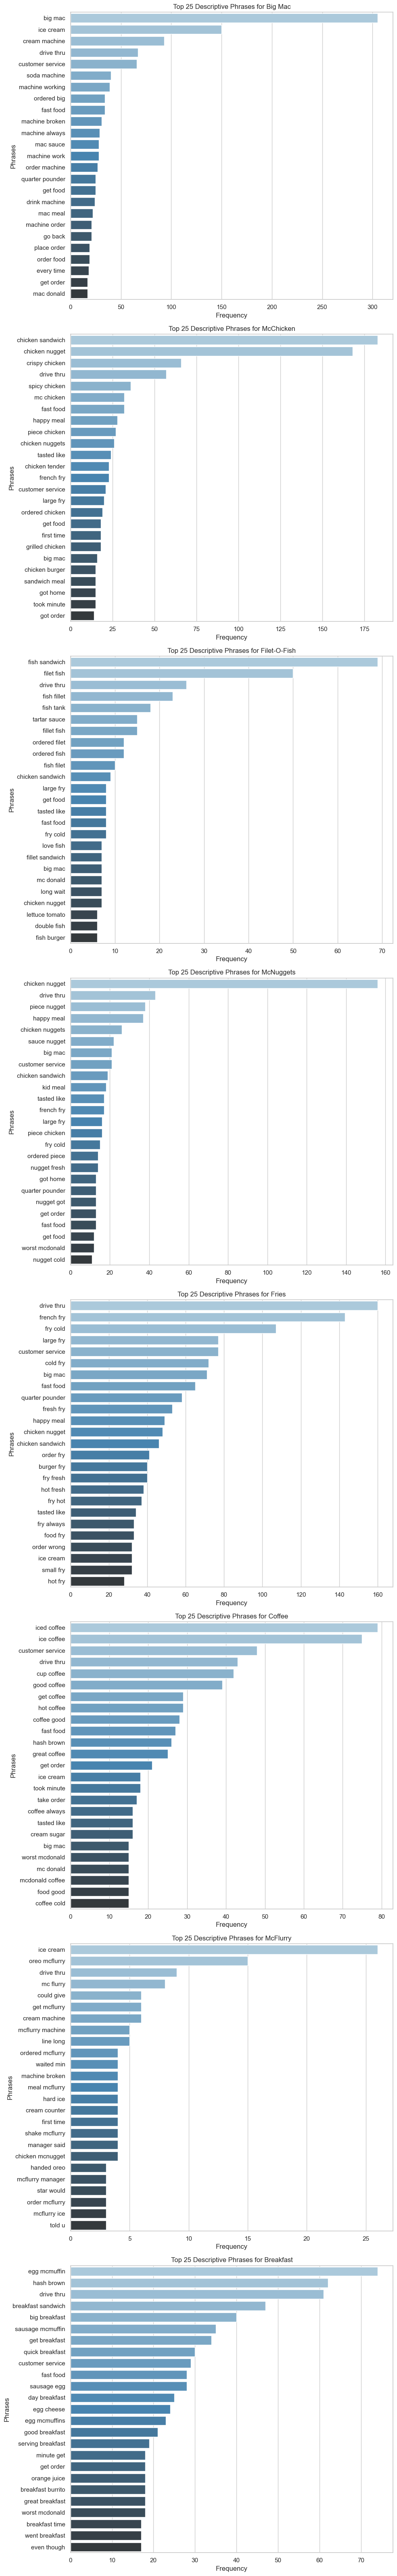

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(nrows=len(descriptive_phrases_by_product.keys()), ncols=1, figsize=(10, 8 * len(descriptive_phrases_by_product.keys())))

if len(descriptive_phrases_by_product.keys()) == 1:
    axes = [axes]

for ax, (product, phrases) in zip(axes, descriptive_phrases_by_product.items()):

    phrase_counts = Counter(phrases)
    most_common_phrases = phrase_counts.most_common(25)
    

    phrases = [phrase for phrase, count in most_common_phrases]
    counts = [count for phrase, count in most_common_phrases]
    

    sns.barplot(x=counts, y=phrases, ax=ax, palette="Blues_d")
    ax.set_title(f'Top 25 Descriptive Phrases for {product}')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Phrases')

plt.tight_layout()
plt.show()

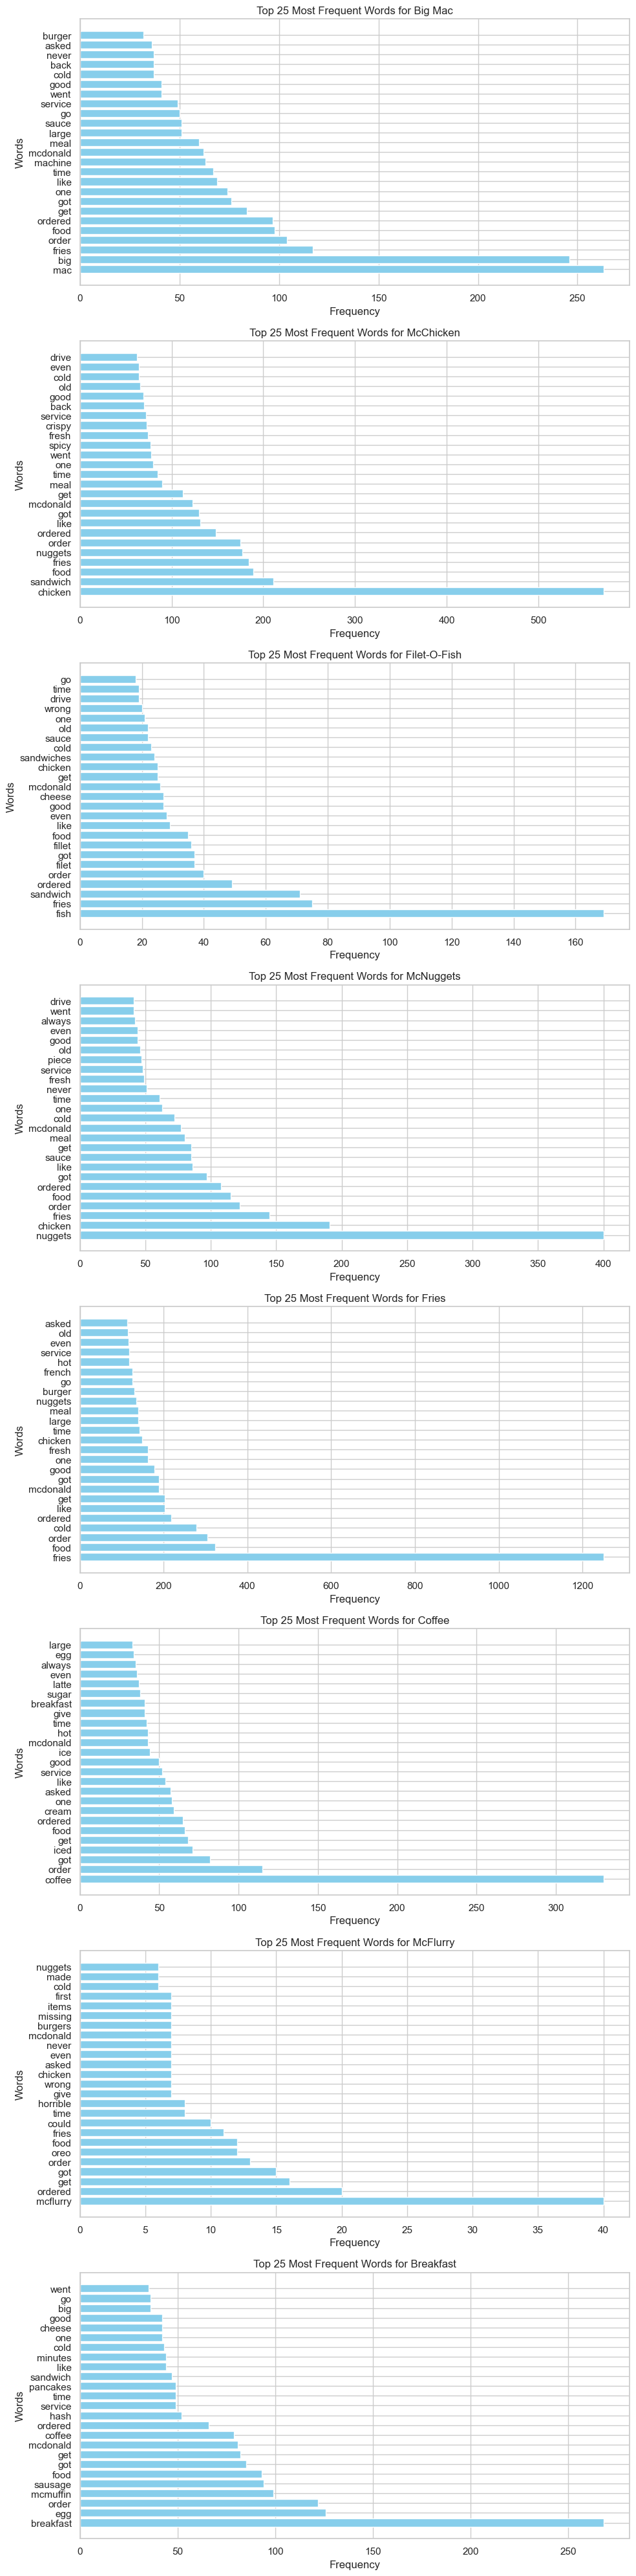

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visualization style
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(len(product_words.keys()), 1, figsize=(10, 5 * len(product_words.keys())))

# If there is only one product, we'll wrap axes in a list for consistent handling
if len(product_words.keys()) == 1:
    axes = [axes]

# Iterate over each product and its respective subplot axis
for ax, (product, words) in zip(axes.flat, product_words.items()):
    word_counts = Counter(words)
    most_common_words = word_counts.most_common(25)
    words, counts = zip(*most_common_words)  # Unpack the words and counts
    
    # Create horizontal bar plot
    ax.barh(words, counts, color='skyblue')
    ax.set_title(f'Top 25 Most Frequent Words for {product}')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('Words')

plt.tight_layout()
plt.show()

# Store Analysis based on sentiments

In [47]:
# Calculating average compound score for each store
average_compound_score_per_store = data_sub.groupby('store_address')['compound_score'].mean().reset_index()
average_compound_score_per_store_sorted = average_compound_score_per_store.sort_values(by='compound_score', ascending=False)

In [48]:
store_count = data_sub['store_address'].nunique()
store_count

39

In [49]:
# top n stores by avg compound sentiment
top_stores = average_compound_score_per_store.nlargest(5, 'compound_score')
top_stores

store_address  compound_score
7   114 Delancey St, New York, NY 10002, United St...        0.776033
25  555 13th St NW, Washington, DC 20004, United S...        0.565267
30  6875 Sand Lake Rd, Orlando, FL 32819, United S...        0.534507
12    160 Broadway, New York, NY 10038, United States        0.406800
33  702-2 Haddonfield-Berlin Rd, Voorhees Township...        0.284223

In [50]:
# bottom n stores by avg compoud sentiment
bottom_stores = average_compound_score_per_store.nsmallest(5, 'compound_score')
bottom_stores 

store_address  compound_score
13  1650 Washington Ave, Miami Beach, FL 33139, Un...       -0.119214
10  151 West 34th Street (Macy's 7th Floor, New Yo...       -0.010472
20  3501 Biscayne Blvd, Miami, FL 33137, United St...        0.027391
36       8500 US-290, Austin, TX 78724, United States        0.080790
28      621 Broadway, Newark, NJ 07104, United States        0.102516

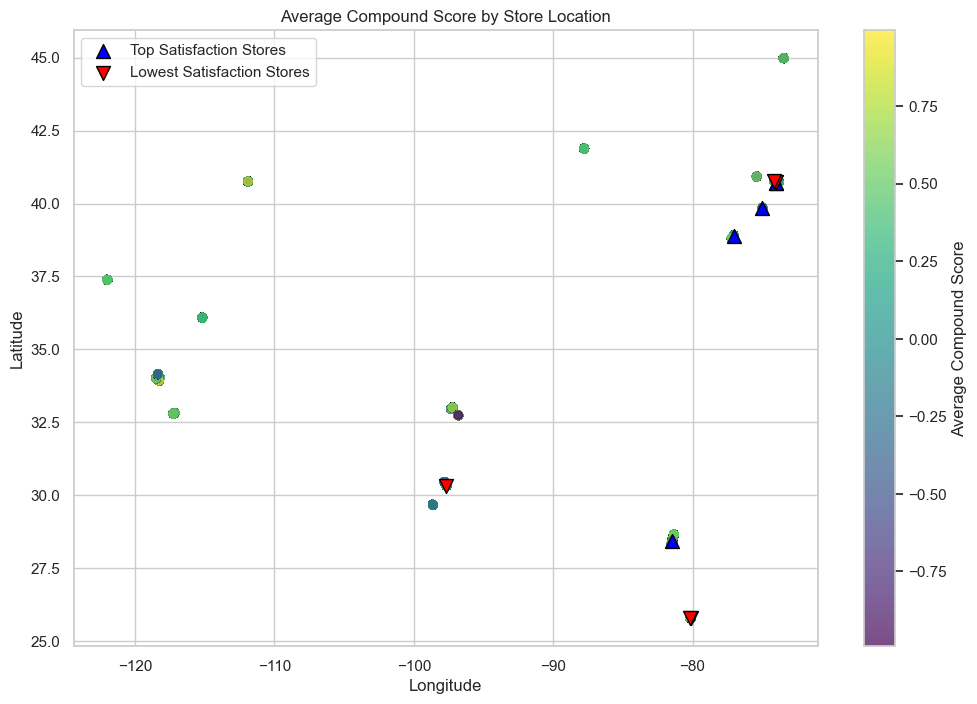

In [51]:
# Using the specific stores' latitude and longitude for top and bottom stores
top_stores_direct = data_sub.loc[data_sub['store_address'].isin(top_stores['store_address'])]
bottom_stores_direct = data_sub.loc[data_sub['store_address'].isin(bottom_stores['store_address'])]


plt.figure(figsize=(12, 8))

# Plotting all stores
scatter = plt.scatter(
    data_sub['longitude'],
    data_sub['latitude'],
    c=data_sub['compound_score'],
    cmap='viridis',
    alpha=0.7
)

# Highlighting the top stores by specific latitude and longitude
plt.scatter(
    top_stores_direct['longitude'].unique(),
    top_stores_direct['latitude'].unique(),
    color='blue',
    edgecolor='black',
    label='Top Satisfaction Stores',
    s=100,
    marker='^'
)

# Highlighting the bottom stores by specific latitude and longitude
plt.scatter(
    bottom_stores_direct['longitude'].unique(),
    bottom_stores_direct['latitude'].unique(),
    color='red',
    edgecolor='black',
    label='Lowest Satisfaction Stores',
    s=100,
    marker='v'
)

plt.colorbar(scatter, label='Average Compound Score')
plt.title('Average Compound Score by Store Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)

plt.show()

In [52]:
# look at top 3 vs bottom 1 to have a balanced number of records
# top 3 stores records
top3_stores = data_sub[(data_sub["store_address"].str.startswith("114 Delancey St")) | 
                     (data_sub["store_address"].str.startswith("555 13th St NW")) |
                     data_sub["store_address"].str.startswith("6875 Sand Lake Rd")]
top3_stores.shape

(496, 14)

In [53]:
# bottom 1 store records
bottom1_store = data_sub[data_sub["store_address"].str.startswith("1650 Washington Ave")]
bottom1_store.shape

(569, 14)

In [54]:
top3_comments = top3_stores["processed_review_nltk"].tolist()
bottom1_comments = bottom1_store["processed_review_nltk"].tolist()
all_comments = top3_comments + bottom1_comments

In [55]:
len(all_comments)

1065

In [56]:
from scipy import sparse
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Creating a single TfidfVectorizer instance
vec = TfidfVectorizer(max_features = 25)

# Applying it to the preprocessed sentences
tfidf_matrix = vec.fit_transform(all_comments)
similarity_matrix = cosine_similarity(tfidf_matrix)
# cosine_similarities = cosine_similarity(tfidf_matrix[0:len(top3_comments)], tfidf_matrix[len(top3_comments):])

In [64]:
similarity_matrix.shape

(1065, 1065)

/Users/yanhuanhuang/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning:

The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.



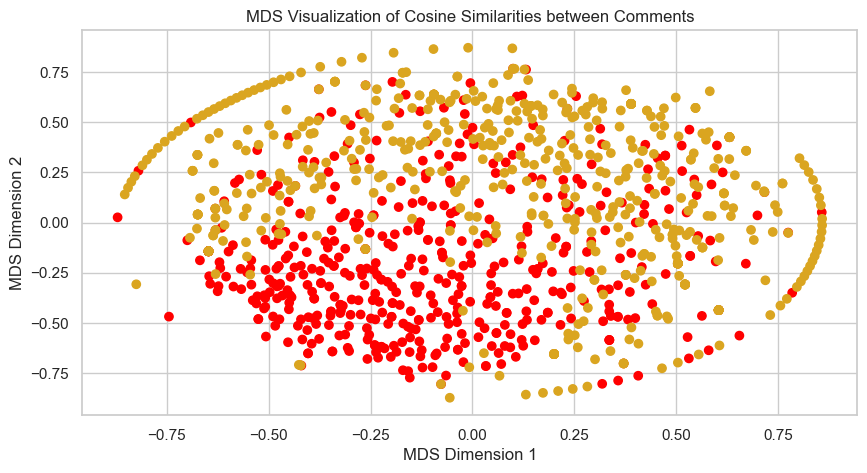

In [57]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)

# Fit the MDS model to convert the cosine similarity matrix to a 2D space
# Note: MDS works on dissimilarity. If your data is similarity scores, you might need to convert them to distances.
mds_results = mds.fit_transform(1 - similarity_matrix)

# Step 3: Plot the results
plt.figure(figsize=(10, 5))
colors = ["red"] * len(top3_comments) + ["goldenrod"] * len(bottom1_comments)
plt.scatter(mds_results[:, 0], mds_results[:, 1], color = colors)

# for i, comment in enumerate(all_comments):
#     plt.text(mds_results[i, 0], mds_results[i, 1], f'{i}', ha='right', va='bottom')

plt.xlabel("MDS Dimension 1")
plt.ylabel("MDS Dimension 2")
plt.title("MDS Visualization of Cosine Similarities between Comments")
plt.show()

## Interactive LDA visulization by stores

In [58]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def tokens_to_list(text):
    text = str(text).lower()

    text = re.sub('((\d+)[\.])', '', text)
    
 
    text = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", text)

    text = text.replace('do not', "don't")
    

    text = re.sub(r"[^a-zA-Z0-9.']+", ' ', text)
    

    text = re.sub(r'\s+', ' ', text).strip()
    
    tokens = [word for word in text.split(' ') if word not in stop_words]
    lmtzr = WordNetLemmatizer()
    lemmatized_text = [lmtzr.lemmatize(word) for word in tokens if word not in stop_words]
    
    return lemmatized_text

In [59]:
from gensim import corpora, models
top3_stores["processed_review_nltk2"] = top3_stores["review"].apply(tokens_to_list)
id2word = corpora.Dictionary(top3_stores["processed_review_nltk2"].tolist())

/var/folders/wf/2r4hslkn0cv6g5b9rp14lh240000gn/T/ipykernel_7932/441339350.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
from gensim import corpora, models

id2word  = corpora.Dictionary(top3_stores["processed_review_nltk2"])

# Filter out extremes to remove tokens that appear too frequently or too rarely
id2word.filter_extremes(no_below = 1, no_above = 0.5)

# Convert the dictionary to a bag of words corpus
corpus = [id2word.doc2bow(text) for text in top3_stores["processed_review_nltk2"]]

In [61]:
from pprint import pprint
import gensim
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus = corpus,
                                       id2word = id2word,
                                       num_topics = num_topics)
# Print the Keyword in the 5 topics with top7 relevant words
pprint(lda_model.print_topics(num_words=7))
doc_lda = lda_model[corpus]

[(0,
  '0.021*"food" + 0.018*"mcdonald\'s" + 0.014*"pizza" + 0.010*"place" + '
  '0.010*"pasta" + 0.009*"order" + 0.008*"one"'),
 (1,
  '0.012*"mcdonald\'s" + 0.012*"order" + 0.009*"arcade" + 0.009*"kid" + '
  '0.009*"pizza" + 0.009*"food" + 0.008*"pasta"'),
 (2,
  '0.020*"pizza" + 0.016*"food" + 0.009*"place" + 0.008*"arcade" + '
  '0.008*"order" + 0.007*"play" + 0.007*"pasta"'),
 (3,
  '0.014*"pizza" + 0.013*"place" + 0.012*"mcdonald\'s" + 0.012*"food" + '
  '0.011*"play" + 0.010*"mcdonald" + 0.009*"service"'),
 (4,
  '0.014*"pizza" + 0.014*"mcdonald\'s" + 0.012*"food" + 0.010*"order" + '
  '0.008*"time" + 0.007*"would" + 0.007*"place"')]


In [62]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis  # Use gensim_models for newer versions
import pickle
LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_data_filepath = 'visulize_topic' + str(num_topics) + '.pkl'

# Save the data to disk
with open(LDAvis_data_filepath, 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

# Load the pre-prepared data
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

# For Jupyter Notebooks, to display inline:
pyLDAvis.enable_notebook()
pyLDAvis.display(LDAvis_prepared)

In [66]:
df1 = top3_stores[top3_stores["review"].str.contains("pizza")]
lst1 = df1["review"].tolist()
lst1[9]

'This place was HUGE & very busy. All of the upstairs was a play jungle gym & an arcade along with some seating. A very diverse menu..the usual but also fire oven pizza bad pasta. Iï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½m giving it three because it was SO slow. I know '

In [ ]:
# bottom1_store["processed_review_nltk2"] = bottom1_store["review"].apply(tokens_to_list)
# id2word = corpora.Dictionary(bottom1_store["processed_review_nltk2"].tolist())

In [ ]:
# id2word  = corpora.Dictionary(bottom1_store["processed_review_nltk2"])

# # Filter out extremes to remove tokens that appear too frequently or too rarely
# id2word.filter_extremes(no_below = 1, no_above = 0.5)

# # Convert the dictionary to a bag of words corpus
# corpus = [id2word.doc2bow(text) for text in bottom1_store["processed_review_nltk2"]]

In [ ]:
# # number of topics
# num_topics = 5
# # Build LDA model
# lda_model = gensim.models.LdaMulticore(corpus = corpus,
#                                        id2word = id2word,
#                                        num_topics = num_topics)
# # Print the Keyword in the 5 topics with top7 relevant words
# pprint(lda_model.print_topics(num_words=7))
# doc_lda = lda_model[corpus]

In [ ]:
# import pyLDAvis
# import pyLDAvis.gensim_models as gensimvis  # Use gensim_models for newer versions
# import pickle
# LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
# LDAvis_data_filepath = 'visulize_topic' + str(num_topics) + '.pkl'

# # Save the data to disk
# with open(LDAvis_data_filepath, 'wb') as f:
#     pickle.dump(LDAvis_prepared, f)

# # Load the pre-prepared data
# with open(LDAvis_data_filepath, 'rb') as f:
#     LDAvis_prepared = pickle.load(f)

# # For Jupyter Notebooks, to display inline:
# pyLDAvis.enable_notebook()
# pyLDAvis.display(LDAvis_prepared)